In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
Data=pd.read_csv('Car_Details.csv')

In [3]:
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
Data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
Data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### DATA PREPROCESSING

In [7]:
[col for col in Data.columns if Data[col].isna().sum()]

[]

In [8]:
Data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# FUEL TYPE
Data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [10]:
Data['Fuel_Type'].value_counts(normalize=True)

Petrol    0.794020
Diesel    0.199336
CNG       0.006645
Name: Fuel_Type, dtype: float64

In [11]:
# SELLER TYPE
Data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [12]:
Data['Seller_Type'].value_counts(normalize=True)

Dealer        0.647841
Individual    0.352159
Name: Seller_Type, dtype: float64

In [13]:
# OWNER
Data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [14]:
Data['Owner'].value_counts(normalize=True)

0    0.963455
1    0.033223
3    0.003322
Name: Owner, dtype: float64

In [15]:
# CAR NAME
Data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [16]:
Data['Car_Name'].value_counts()

city                   26
corolla altis          16
verna                  14
fortuner               11
brio                   10
                       ..
KTM 390 Duke            1
Suzuki Access 125       1
Hero Super Splendor     1
land cruiser            1
Bajaj Pulsar 135 LS     1
Name: Car_Name, Length: 98, dtype: int64

In [17]:
Counts=Data['Car_Name'].value_counts()
Labels=Data['Car_Name'].unique()

Frequent_Labels=[x for x in Labels if Counts[x]>5]
Frequent_Labels

['sx4',
 'ciaz',
 'ertiga',
 'fortuner',
 'innova',
 'corolla altis',
 'Royal Enfield Classic 350',
 'i20',
 'grand i10',
 'eon',
 'verna',
 'city',
 'brio',
 'amaze',
 'jazz']

In [18]:
Data['Current_Year']=2020
Data['Number_Year']=Data['Current_Year']-Data['Year']

In [19]:
Data.drop(['Current_Year','Year','Car_Name'],axis=1,inplace=True)
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


### EDA

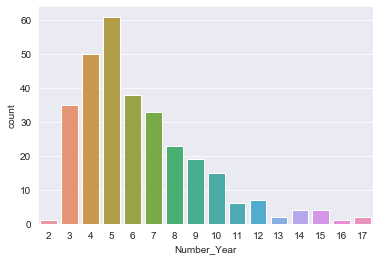

In [20]:
# NUMBER OF YEAR :
sns.countplot(Data['Number_Year'])

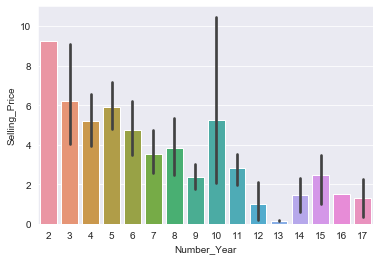

In [21]:
sns.barplot(x='Number_Year',y='Selling_Price',data=Data)

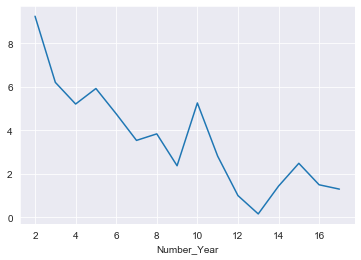

In [22]:
# WITH THE INCREASE IN NUMBER OF YEARS OF CAR,THE SELLING PRICE OF CAR GRADUALLY DECREASES
Data['Selling_Price'].groupby(Data['Number_Year']).mean().plot()

In [23]:
Data['Selling_Price'].groupby(Data['Fuel_Type']).mean()

Fuel_Type
CNG        3.100000
Diesel    10.278500
Petrol     3.264184
Name: Selling_Price, dtype: float64

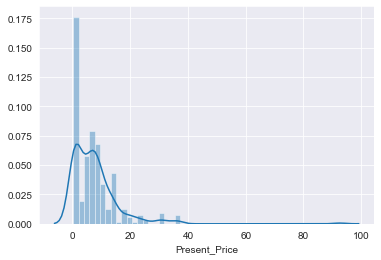

In [24]:
# PRESENT PRICE : HIGHLY RIGHT SKEWED AND LEPTOKRUTIC NATURE
sns.distplot(Data['Present_Price'],bins=50)

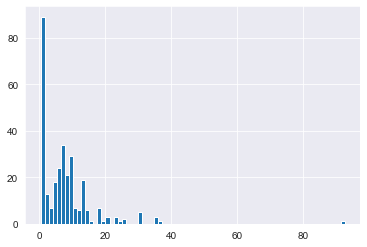

In [25]:
plt.hist(Data['Present_Price'],bins=75)
plt.show()

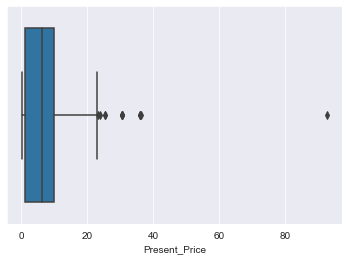

In [26]:
sns.boxplot(Data['Present_Price'])

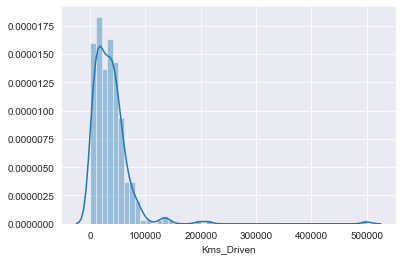

In [27]:
# KMs DRIVEN : HIGHLY SKEWED AND LEPTOKRUTIC IN NATURE 
sns.distplot(Data['Kms_Driven'])

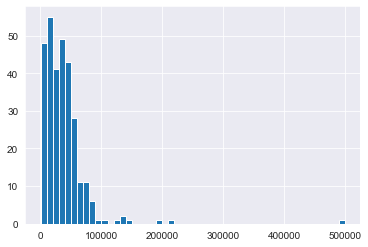

In [28]:
plt.hist(Data['Kms_Driven'],bins=50)
plt.show()

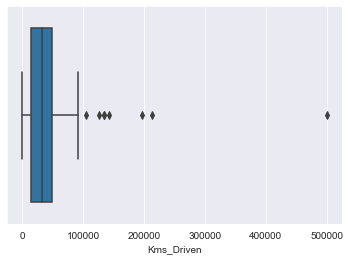

In [29]:
sns.boxplot(Data['Kms_Driven'])

### FEATURE ENGINEERING

In [30]:
Data=pd.get_dummies(Data,drop_first=True)
Data

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


#### VARIABLE TRANSFORMATION

([array([37., 53., 12., 47., 89., 36., 17.,  9.,  0.,  1.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([-1.03584378, -0.25020263,  0.53543852,  1.32107967,  2.10672082,
         2.89236197,  3.67800312,  4.46364427,  5.24928542,  6.03492657,
         6.82056772]),
 <a list of 2 Lists of Patches objects>)

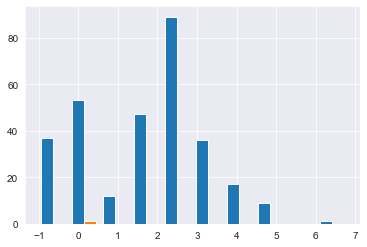

In [31]:
# BOXCOX TRANSFORMATION
plt.hist(stats.boxcox(Data['Present_Price']))

([array([  0.,  10.,  30.,  63., 105.,  79.,  11.,   2.,   0.,   1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([  0.27530431,  13.34741952,  26.41953474,  39.49164996,
         52.56376518,  65.6358804 ,  78.70799562,  91.78011083,
        104.85222605, 117.92434127, 130.99645649]),
 <a list of 2 Lists of Patches objects>)

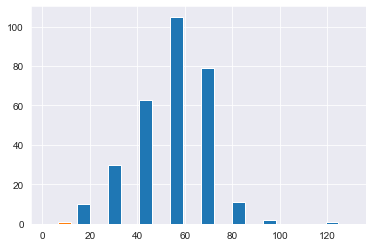

In [32]:
plt.hist(stats.boxcox(Data['Kms_Driven']))

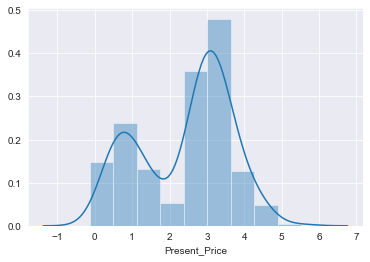

In [33]:
# LOGARITHM TRANSFORMATION
sns.distplot(np.log(Data['Present_Price'])+1)

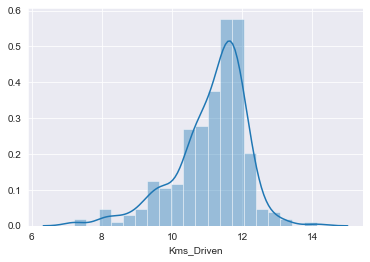

In [34]:
sns.distplot(np.log(Data['Kms_Driven'])+1)

#### INTERQUARTILE RANGE

In [35]:
# 1.PRESENT PRICE
IQR=Data['Present_Price'].quantile(0.75)-Data['Present_Price'].quantile(0.25)
Lower_Bridge=Data['Present_Price'].quantile(0.25)-(IQR*1.5)
Upper_Bridge=Data['Present_Price'].quantile(0.75)+(IQR*1.5)

In [36]:
Lower_Bridge,IQR,Upper_Bridge

(-11.850000000000001, 8.700000000000001, 22.950000000000003)

In [37]:
Present_Price_1=Data.copy()

In [38]:
Present_Price_1[Present_Price_1['Present_Price']>=23]=23

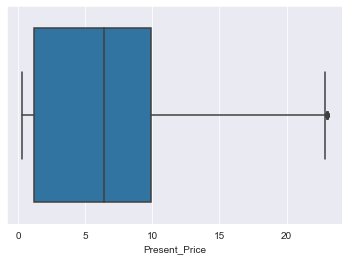

In [39]:
sns.boxplot(Present_Price_1['Present_Price'])

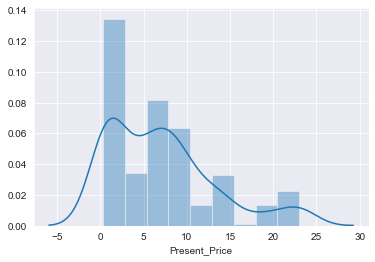

In [40]:
sns.distplot(Present_Price_1['Present_Price'])

In [41]:
# 2.KMs DRIVEN
IQR=Data['Kms_Driven'].quantile(0.75)-Data['Kms_Driven'].quantile(0.25)
Lower_Bridge=Data['Kms_Driven'].quantile(0.25)-(IQR*1.5)
Upper_Bridge=Data['Kms_Driven'].quantile(0.75)+(IQR*1.5)

In [42]:
Lower_Bridge,IQR,Upper_Bridge

(-35650.5, 33767.0, 99417.5)

In [43]:
Kms_Driven_1=Data.copy()

In [44]:
Kms_Driven_1[Kms_Driven_1['Kms_Driven']>=99417]=99417

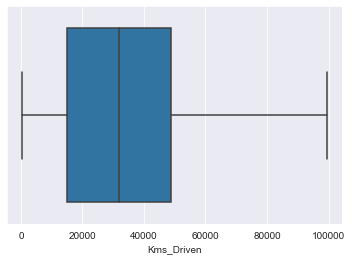

In [45]:
sns.boxplot(Kms_Driven_1['Kms_Driven'])

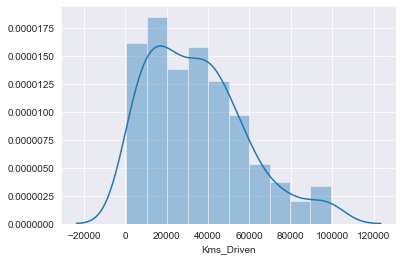

In [46]:
sns.distplot(Kms_Driven_1['Kms_Driven'])

In [47]:
# AS WE APPLY BOXCOX TRANSFORMATION THROUGH KMs DRIVEN , IT FOLLOWS GAUSSIAN DISTRIBUTION
Data1 = Kms_Driven_1.copy()

Boxcox_Transformer = PowerTransformer(method='box-cox', standardize=False)
Data1['Kms_Driven'] = Boxcox_Transformer.fit_transform(Data1[['Kms_Driven']])

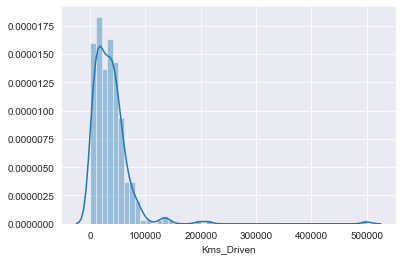

In [48]:
sns.distplot(Data['Kms_Driven'],kde=True)

In [49]:
# APPLYING INTERQUARTILE RANGE IN PRESENT PRICE
Data1[Data1['Present_Price']>=23]=23

In [50]:
Data1

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,259.614754,0,6,0,1,0,1
1,4.75,9.54,323.916050,0,7,1,0,0,1
2,7.25,9.85,135.335978,0,3,0,1,0,1
3,2.85,4.15,118.154697,0,9,0,1,0,1
4,4.60,6.87,321.940787,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,289.655431,0,4,1,0,0,1
297,4.00,5.90,379.440763,0,5,0,1,0,1
298,3.35,11.00,454.891738,0,11,0,1,0,1
299,11.50,12.50,153.704306,0,3,1,0,0,1


### FEATURE SELECTION

In [51]:
X=Data.drop('Selling_Price',axis=1)
y=Data['Selling_Price']

#### CORRELATION

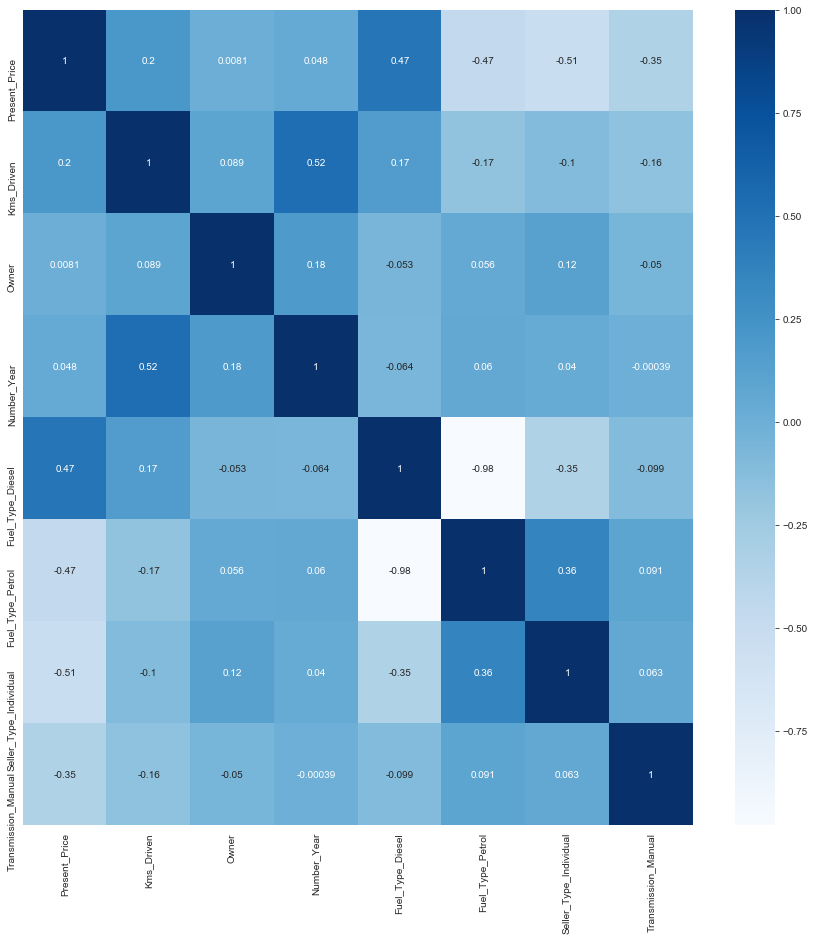

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,cmap='Blues')

In [53]:
# CHECKING OUT THE HIGH CORRELATED DATAS ON THE BASIS OF THRESOLD
def Correlation(Dataset,Thresold):
    Col_Corr=set()
    Corr_Matrix=Dataset.corr()
    for i in range(len(Corr_Matrix.columns)):
        for j in range(i):
            if abs(Corr_Matrix.iloc[i,j])>=Thresold:
                Colname=Corr_Matrix.columns[i]
                Col_Corr.add(Colname)
    return Col_Corr
Drop_Columns=Correlation(X,0.75)

In [54]:
# FEATURES HAVING HIGHLY CORREALATED VALUES 
Drop_Columns=list(Drop_Columns)
Drop_Columns

['Fuel_Type_Petrol']

#### EXTRATREES REGRESSOR

In [55]:
ETR=ExtraTreesRegressor()
ETR.fit(X,y)

ExtraTreesRegressor()

In [56]:
ETR.feature_importances_

array([0.38613145, 0.03752207, 0.0004256 , 0.07898412, 0.22444332,
       0.00679649, 0.13170576, 0.13399119])

In [57]:
Ranked_Features=pd.Series(ETR.feature_importances_,index=X.columns)
Ranked_Features

Present_Price             0.386131
Kms_Driven                0.037522
Owner                     0.000426
Number_Year               0.078984
Fuel_Type_Diesel          0.224443
Fuel_Type_Petrol          0.006796
Seller_Type_Individual    0.131706
Transmission_Manual       0.133991
dtype: float64

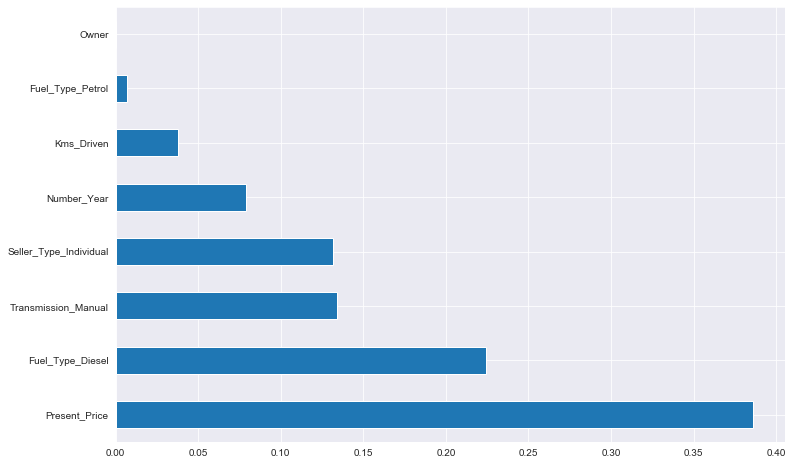

In [58]:
plt.figure(figsize = (12,8))
Ranked_Features.nlargest(20).plot(kind='barh')

#### SELECT K-BEST

In [59]:
Ordered_Rank_Features=SelectKBest(score_func=f_regression,k='all')
Ordered_Features=Ordered_Rank_Features.fit(X,y)

In [60]:
Ordered_Features.scores_ 

array([1.01592332e+03, 2.54931165e-01, 2.35195553e+00, 1.76576415e+01,
       1.31264543e+02, 1.23445920e+02, 1.30164012e+02, 4.65779256e+01])

In [61]:
Scores=pd.DataFrame(Ordered_Features.scores_,columns=['Score'])
Columns=pd.DataFrame(X.columns,columns=['Columns'])

Features_Rank=pd.concat([Columns,Scores],axis=1)
Features_Rank.sort_values(by=['Score'],ascending=False)

,Columns,Score
0,Present_Price,1015.923320
4,Fuel_Type_Diesel,131.264543
6,Seller_Type_Individual,130.164012
5,Fuel_Type_Petrol,123.445920
7,Transmission_Manual,46.577926
3,Number_Year,17.657642
2,Owner,2.351956
1,Kms_Driven,0.254931


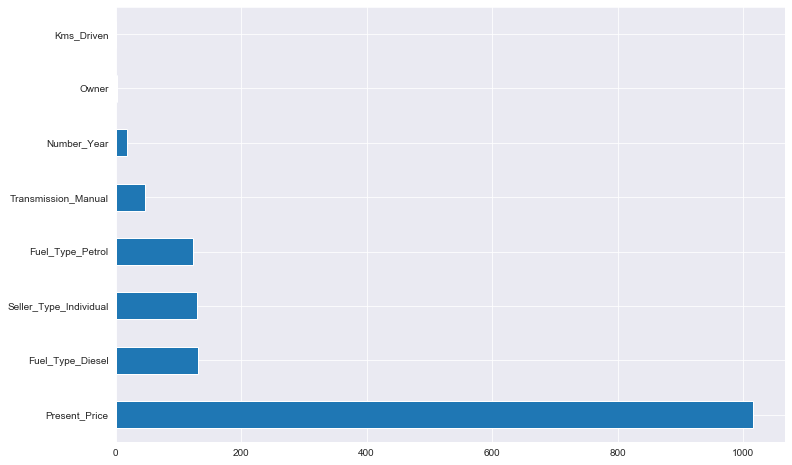

In [62]:
Features_Rank=pd.Series(Ordered_Features.scores_ ,index=X.columns)

plt.figure(figsize = (12,8))
Features_Rank.nlargest(20).plot(kind='barh')

### FEATURE SCALING

In [63]:
# TRAIN TEST SPLIT
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
# USED STANDARDIZATION,AS IT FOLLOWS GAUSSIAN DISTRIBUTION
Standard_Scaler=StandardScaler()

In [65]:
X_Train_Stand=pd.DataFrame(Standard_Scaler.fit_transform(X_Train),columns=X_Train.columns)
X_Train_Stand

,Present_Price,Kms_Driven,Owner,Number_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.747647,-0.761473,-0.180741,-1.148467,-0.479070,0.493046,1.346291,0.369274
1,0.824530,-0.577291,-0.180741,-0.454762,-0.479070,0.493046,-0.742781,-2.708013
2,-0.806251,-0.062048,-0.180741,-0.454762,-0.479070,0.493046,1.346291,0.369274
3,0.690416,-0.370261,-0.180741,-0.454762,-0.479070,0.493046,-0.742781,0.369274
4,-0.177381,-0.540804,-0.180741,-0.454762,-0.479070,0.493046,-0.742781,0.369274
...,...,...,...,...,...,...,...,...
220,-0.778076,-0.458389,-0.180741,0.238943,-0.479070,0.493046,1.346291,0.369274
221,0.564191,0.171094,-0.180741,0.932647,2.087377,-2.028210,-0.742781,0.369274
222,-0.453498,-0.493360,3.516238,-0.107910,-0.479070,0.493046,1.346291,0.369274
223,0.284693,0.738585,-0.180741,0.932647,-0.479070,0.493046,-0.742781,0.369274


In [66]:
X_Test_Stand=pd.DataFrame(Standard_Scaler.fit_transform(X_Test),columns=X_Test.columns)
X_Test_Stand

,Present_Price,Kms_Driven,Owner,Number_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.957752,-0.476637,-0.164399,-0.883243,-0.557086,0.557086,1.38675,-2.201398
1,0.702626,-1.049504,-0.164399,-0.883243,-0.557086,0.557086,-0.72111,0.454257
2,0.167431,1.107325,-0.164399,0.500808,1.795055,-1.795055,-0.72111,0.454257
3,-0.957752,0.007351,6.082763,0.846820,-0.557086,0.557086,1.38675,0.454257
4,1.341037,0.227390,-0.164399,0.154795,-0.557086,0.557086,-0.72111,0.454257
...,...,...,...,...,...,...,...,...
71,-0.009693,0.667336,-0.164399,0.846820,-0.557086,0.557086,-0.72111,-2.201398
72,-0.023710,-0.275606,-0.164399,-0.883243,-0.557086,0.557086,-0.72111,0.454257
73,-0.103989,0.250842,-0.164399,-0.537230,-0.557086,0.557086,-0.72111,0.454257
74,-0.465883,-0.489441,-0.164399,0.500808,-0.557086,0.557086,-0.72111,0.454257


### MODEL SELECTION

In [67]:
Models=[]
Accuracy_Scores=[]

#### RANDOM FOREST REGRESSOR

In [68]:
RFR=RandomForestRegressor()

# HYPERPARAMETER TUNING
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,25,5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

Random_Grid={
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
            }

RF_Random = RandomizedSearchCV(estimator=RFR,param_distributions=Random_Grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [69]:
RF_Random.fit(X_Train,y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.7s
[CV] n_estimators=500, min_samples_spl

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=1300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=1300, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=15, total=   1.6s
[CV] n_estimators=1300, min_samples_split=15, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
RF_Random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [71]:
y_Pred=RF_Random.predict(X_Test)

print('MAE:', metrics.mean_absolute_error(y_Test,y_Pred))
print('MSE:', metrics.mean_squared_error(y_Test,y_Pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_Test,y_Pred)))

MAE: 0.6336522272340241
MSE: 1.020031893762705
RMSE: 1.0099662834781689


In [72]:
metrics.r2_score(y_Test,y_Pred)

0.9628732393522227

In [73]:
Models.append('Random Forest Regressor')
Accuracy_Scores.append(100*(metrics.r2_score(y_Test,y_Pred)))

#### LINEAR REGRESSION

In [74]:
LR=LinearRegression()

LR.fit(X_Train_Stand,y_Train)

LinearRegression()

In [75]:
y_Pred1=LR.predict(X_Test_Stand)

print('MAE:', metrics.mean_absolute_error(y_Test,y_Pred1))
print('MSE:', metrics.mean_squared_error(y_Test,y_Pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_Test,y_Pred1)))

MAE: 1.221493892767727
MSE: 3.269375441325069
RMSE: 1.808141432887668


In [76]:
metrics.r2_score(y_Test,y_Pred1)

0.8810024272574022

In [77]:
Models.append('Linear Regression')
Accuracy_Scores.append(100*(metrics.r2_score(y_Test,y_Pred1)))

#### SUPPORT VECTOR REGRESSION

In [78]:
SV=SVR()

SV.fit(X_Train_Stand,y_Train)

SVR()

In [79]:
y_Pred2=SV.predict(X_Test_Stand)

print('MAE:', metrics.mean_absolute_error(y_Test,y_Pred2))
print('MSE:', metrics.mean_squared_error(y_Test,y_Pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_Test,y_Pred2)))

MAE: 1.3338683887333536
MSE: 8.504156935174672
RMSE: 2.9161887687827535


In [80]:
metrics.r2_score(y_Test,y_Pred2)

0.6904686990926423

In [81]:
Models.append('Support Vector Regression')
Accuracy_Scores.append(100*(metrics.r2_score(y_Test,y_Pred2)))

#### DECISION TREE REGRESSOR

In [82]:
DTR=DecisionTreeRegressor()

DTR.fit(X_Train_Stand,y_Train)

DecisionTreeRegressor()

In [83]:
y_Pred3=DTR.predict(X_Test_Stand)

print('MAE:', metrics.mean_absolute_error(y_Test,y_Pred3))
print('MSE:', metrics.mean_squared_error(y_Test,y_Pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_Test,y_Pred3)))

MAE: 1.1548684210526314
MSE: 6.123267105263159
RMSE: 2.4745236117812976


In [84]:
metrics.r2_score(y_Test,y_Pred3)

0.777127486317207

In [85]:
Models.append('Decision Tree Regressor')
Accuracy_Scores.append(100*(metrics.r2_score(y_Test,y_Pred3)))

#### MODEL SCORES VISUALIZATION

In [86]:
Visualize_Scores=pd.DataFrame(list(zip(Models,Accuracy_Scores)),columns=['Models','Accuracy'])
Visualize_Scores

,Models,Accuracy
0,Random Forest Regressor,96.287324
1,Linear Regression,88.100243
2,Support Vector Regression,69.046870
3,Decision Tree Regressor,77.712749


In [87]:
import pickle

File=open('Car_Price.pkl','wb')
pickle.dump(RF_Random,File)